# ML 3 - Logistic Regression

- Name: Gelli Mae Gloria
- Date: January 13, 2021
- Student Number: 2015-06435

## I - Data Cleaning

### A. Preliminaries
Import all important packages from Python: 
* **Pandas**: Reading and loading the file; make dataframes 
* **Numpy**: For multidimensional array and operations on arrays
* **Matplotlib/Seaborn**: For our visualizations
* **Random**: For the initialization of the random number generator for the weights

In [1]:
# Import important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from random import seed

In [2]:
# Create dataframe for the banana dataset

banana = pd.read_excel('ML_dataset.xlsx', sheet_name = 'ML3 - Banana')
banana.head()

,Image,R,G,B,Ripeness
0,1,247.277,235.203,203.795,1
1,2,242.005,227.006,162.201,1
2,3,176.264,181.173,158.842,0
3,4,187.179,194.187,170.547,0
4,5,237.265,225.627,197.295,1


We normalize each feature so that they would be in the range of 0-1. We also add another column: x_0 for the *bias*

In [3]:
banana['R'] = banana['R']/255
banana['G'] = banana['G']/255
banana['B'] = banana['B']/255
banana['x_0'] = 1

banana.shape

(42, 6)

## II - Divide dataset to train and test sets
Like in the Perceptron activity, we also divide our datasets to **train** and **test** sets. The same procedure was done where **70%** of the whole dataset is included in our *train set* while the other **30%** is for the *test/dev set*.

Since we have 42 samples (21 - ripe, 21 - unripe), 
* train set - $28$
* test set - $14$

In [4]:
# Get our ripe and unripe datasets:
ripe = banana[banana['Ripeness']==1]
unripe = banana[banana['Ripeness']==0]

# Train set
train = pd.concat([ripe.iloc[0:14], unripe.iloc[0:14]], ignore_index = True, sort = False) # Locate all 28 

# Test set
test = pd.concat([ripe.iloc[14:], unripe.iloc[14:]], ignore_index = True, sort = False)
test

,Image,R,G,B,Ripeness,x_0
0,20,0.963149,0.919502,0.749667,1,1
1,25,0.805482,0.767467,0.725114,1,1
2,26,0.895467,0.815141,0.605620,1,1
3,27,0.840549,0.766933,0.684800,1,1
4,29,0.720933,0.669125,0.581965,1,1
5,41,0.953600,0.921812,0.725000,1,1
6,42,0.933114,0.886075,0.750537,1,1
7,34,0.923110,0.913941,0.766808,0,1
8,35,0.590239,0.557024,0.248188,0,1
9,36,0.719725,0.783851,0.449184,0,1


Now, we arrange the needed matrices:
- **x** = $[x_0, x_1, x_2]$ where $x_0$ = 1.0, $x_1$ = first feature (R), and $x_2$ = second feature (G), and $x_3$ = third feature (B) and 
- **Y** = actual class of the sample

for both the train and test sets

In [10]:
x_train = np.array(train[['x_0','R','G','B']])
Y_train = np.array(train[['Ripeness']])

x_test = np.array(test[['x_0','R','G','B']])
Y_test = np.array(test[['Ripeness']])

## III - Logistic Regression
### A. Defining Functions
Here, we define functions for the perceptron algorithm.
   1. `initial()` - function that returns the weights with elements initialized by a pseudo-random generator.
   2. `sigmoid()` - activation function (sigmoid function)
   3. `predict()` - utilizes the other two defined functions ( **Logistic Regression Model** )
   4. `images() `  - function for the visualizations

In [5]:
# Activation function
def sigmoid(b,z):
    """
    Compute the sigmoid of z
    Arguments:
        z -- A scalar or numpy array of any size.
        b -- scalar; tells how steep our sigmoid 
              function will be
    Return:
        s -- sigmoid(z)
    """

    s = 1/(1+np.exp(-b*z))
    
    return s

In [6]:
# Initial weights
def initial(dim):
    """
    Uses pseudo-random number generator to initialize our weights

    Arguments:
    dim -- length of the matrix x

    Return:
    weights -- initial value for the weights
    
    """
    weights = 2*np.random.random((dim,1))-1
    return weights 

In [7]:
def predict(x, y, weights, l_rate, iteration, b):
    erf = []
    change = np.zeros((iteration//100, weights.shape[0]))
    for i in range(iteration):
        layer0 = x
        layer1 = sigmoid(b, np.dot(layer0, weights)) #prediction

        layer1_error = y-layer1
            
        dw = l_rate*np.dot(layer1_error.T, x)/x.shape[0]
        weights = (weights + dw.T) 
        if (i%10) == 0:
            a = i//100
            change[a,:] = dw
            erf.append(0.5*np.sum(layer1_error)**2)

    return weights, layer1, change, erf

In [8]:
def images(image, ys):
    """Plot clusters given the design matrix and cluster labels"""
    k_max = len(image) + 1
    k_mid = k_max//3
    fig, ax = plt.subplots(3, k_max//3,figsize=(15,5),gridspec_kw=dict(wspace=0.05),subplot_kw=dict(aspect='equal') ,dpi=200)
#     plt.subplots_adjust(bottom=0)
    for k, y in zip(range(0, k_max+1), image):
        if k < k_mid:
            ax[0][k].imshow(image[k])
            ax[0][k].set_title("Ripeness = " + str(float(ys[k+1])*100)+'%', fontsize = 8)
            ax[0][k].set_axis_off()
            
        elif k < k_mid+2:
            ax[1][k-k_mid].imshow(image[k])
            ax[1][k-k_mid].set_title("Ripeness = " + str(float(ys[k+1])*100)+'%', fontsize = 8)
            ax[1][k-k_mid].set_axis_off()
        else:
            ax[2][k-2*k_mid].imshow(image[k])
            ax[2][k-2*k_mid].set_title("Ripeness = " + str(float(ys[k+5])*100)+'%', fontsize = 8)
            ax[2][k-2*k_mid].set_axis_off()
    return ax

## B. Training

In [11]:
seed(1)

dim = x_train.shape[1]
weights = initial(dim)
print("Initial weights:%s \n" %(weights))

l_rate = 0.1
iteration = 1200
b = [1,5,10]

result, layer1, change, erf = predict(x_train, Y_train, weights, l_rate, iteration, b[0])
result_1, layer1_1, change_1, erf = predict(x_train, Y_train, weights, l_rate, iteration, b[1])
result_2, layer1_2, change_2, erf = predict(x_train, Y_train, weights, l_rate, iteration, b[2])


Initial weights:[[ 0.87376832]
 [-0.41095265]
 [ 0.22631274]
 [ 0.45493975]] 



In [12]:
print("\n Updated Weights (beta=%s): %s" %(b[0],result))
print("\n Updated Weights (beta=%s): %s" %(b[1],result_1))
print("\n Updated Weights (beta=%s): %s" %(b[2],result_2))


 Updated Weights (beta=1): [[-1.11323869]
 [ 1.32143805]
 [ 0.27236809]
 [-0.24152148]]

 Updated Weights (beta=5): [[-0.54230944]
 [ 1.04024529]
 [ 0.05280121]
 [-0.55480565]]

 Updated Weights (beta=10): [[-0.36156613]
 [ 0.90878445]
 [-0.02234572]
 [-0.57590438]]


### C.1. Visualizations (Weight change & Cost) 

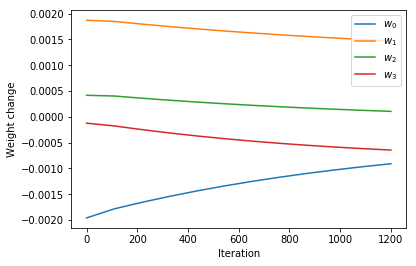

In [21]:
plt.plot(np.linspace(0,iteration,change.shape[0]), change[:,0], label = '$w_0$')
plt.plot(np.linspace(0,iteration,change.shape[0]), change[:,1], label = '$w_1$')
plt.plot(np.linspace(0,iteration,change.shape[0]), change[:,2], label = '$w_2$')
plt.plot(np.linspace(0,iteration,change.shape[0]), change[:,3], label = '$w_3$')
plt.ylabel('Weight change')
plt.xlabel('Iteration')
plt.legend()

plt.savefig('ML3_weigths.png')

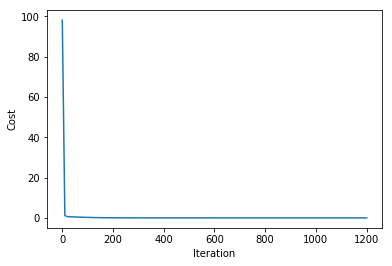

In [16]:
plt.plot(np.linspace(0,iteration,len(erf)), erf)
plt.ylabel('Cost')
plt.xlabel('Iteration')

plt.savefig('ML3_Cost.png')

### C.2 Visualizations (Degree of Ripeness)

In [17]:
# layer1 = sigm(x_test.T, result)
layer1_test = sigmoid(np.dot(x_test, result),b[0])
layer1_test1 = sigmoid(np.dot(x_test, result),b[1])
layer1_test2 = sigmoid(np.dot(x_test, result),b[2])

# print("Test Accuracy = %f \n" % (accuracy_metric(Y_train,layer1.T)))
for i in range(len(Y_test)):
    print("Probability(beta = %s) = %0.5f, Actual Class:%s" % (b[0], layer1_test[i], Y_test[i]))
    print("Probability(beta = %s) = %0.5f, Actual Class:%s" % (b[1], layer1_test1[i], Y_test[i]))
    print("Probability(beta = %s) = %0.5f, Actual Class:%s \n" % (b[2], layer1_test2[i], Y_test[i]))


Probability(beta = 1) = 0.55697, Actual Class:[1]
Probability(beta = 5) = 0.75849, Actual Class:[1]
Probability(beta = 10) = 0.90795, Actual Class:[1] 

Probability(beta = 1) = 0.49626, Actual Class:[1]
Probability(beta = 5) = 0.48133, Actual Class:[1]
Probability(beta = 10) = 0.46272, Actual Class:[1] 

Probability(beta = 1) = 0.53639, Actual Class:[1]
Probability(beta = 5) = 0.67460, Actual Class:[1]
Probability(beta = 10) = 0.81125, Actual Class:[1] 

Probability(beta = 1) = 0.51025, Actual Class:[1]
Probability(beta = 5) = 0.55106, Actual Class:[1]
Probability(beta = 10) = 0.60106, Actual Class:[1] 

Probability(beta = 1) = 0.47032, Actual Class:[1]
Probability(beta = 5) = 0.35563, Actual Class:[1]
Probability(beta = 10) = 0.23348, Actual Class:[1] 

Probability(beta = 1) = 0.55548, Actual Class:[1]
Probability(beta = 5) = 0.75292, Actual Class:[1]
Probability(beta = 10) = 0.90278, Actual Class:[1] 

Probability(beta = 1) = 0.54485, Actual Class:[1]
Probability(beta = 5) = 0.71083,

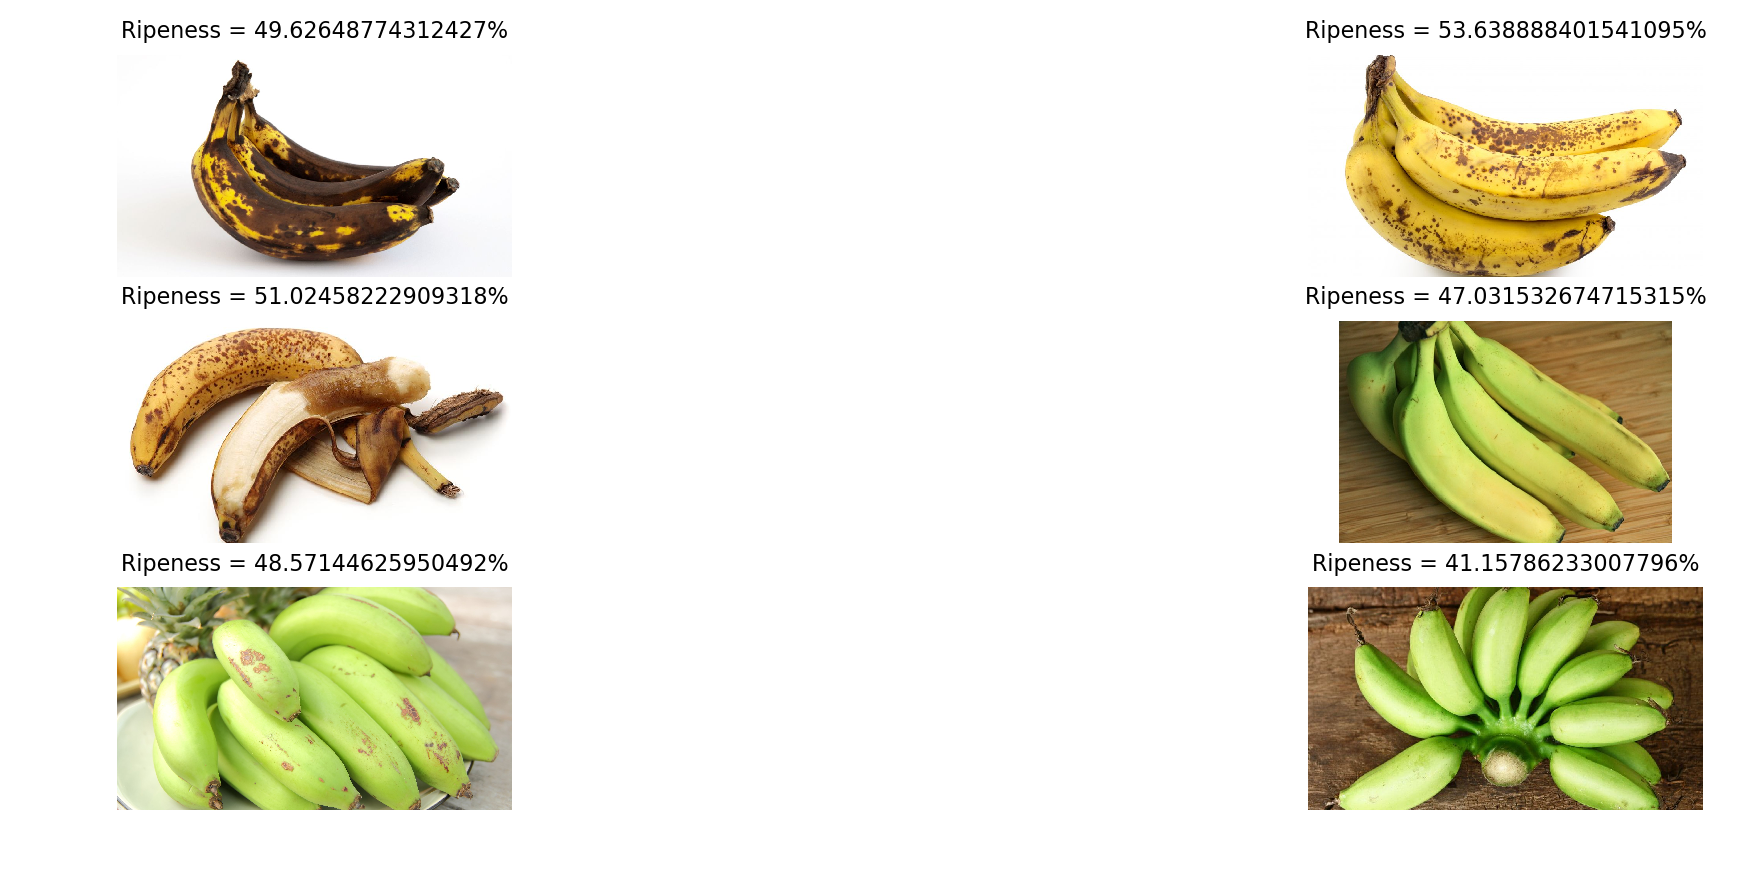

In [18]:
my_image = []
fname = []
image = []


for i in range(6):
    if i < 3:
        my_image.append("Image_"+str(i+25)+".jpg")
    #     print("Ripeness = " + str(a.T[i])) #+ ", the algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
        fname.append("E:/Acaaaaads/App Physics 186/Banana/" + my_image[i])
        image.append(np.array(plt.imread(fname[i])))
    else:
        my_image.append("Image_"+str(i+32)+".jpg")
    #     print("Probability = " + str(a.T[i])) #+ ", the algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
        fname.append("E:/Acaaaaads/App Physics 186/Banana/" + my_image[i])
        image.append(np.array(plt.imread(fname[i])))
images(image, layer1_test)
plt.savefig('ML3_beta_1.png')

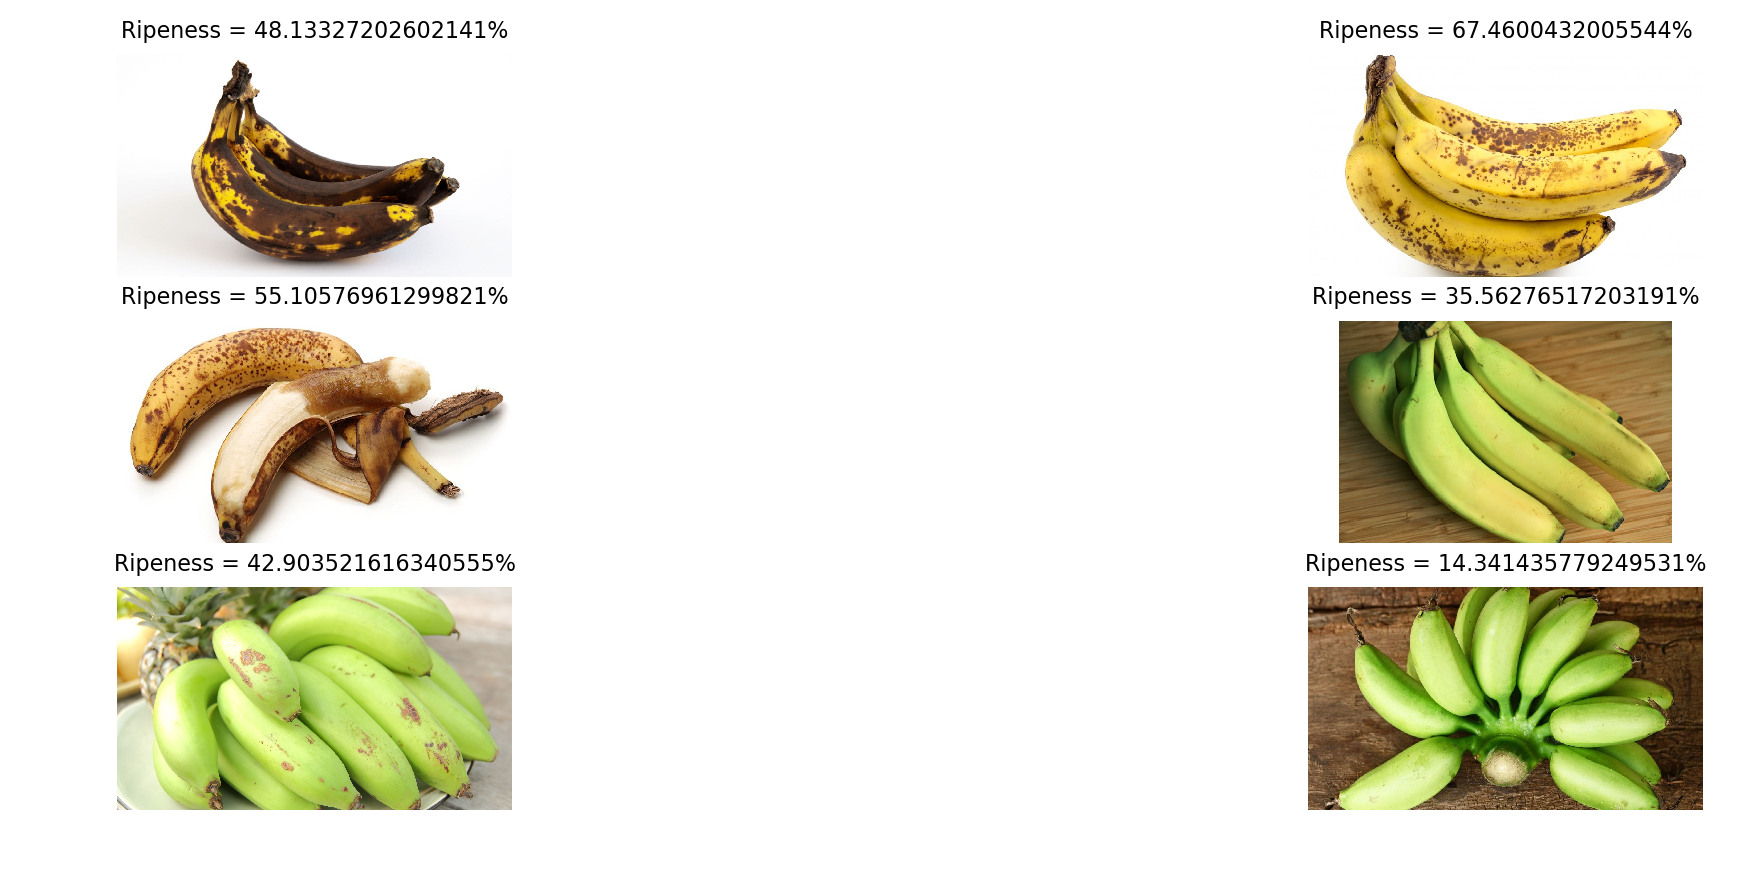

In [19]:
images(image, layer1_test1)
plt.savefig('ML3_beta_5.png')

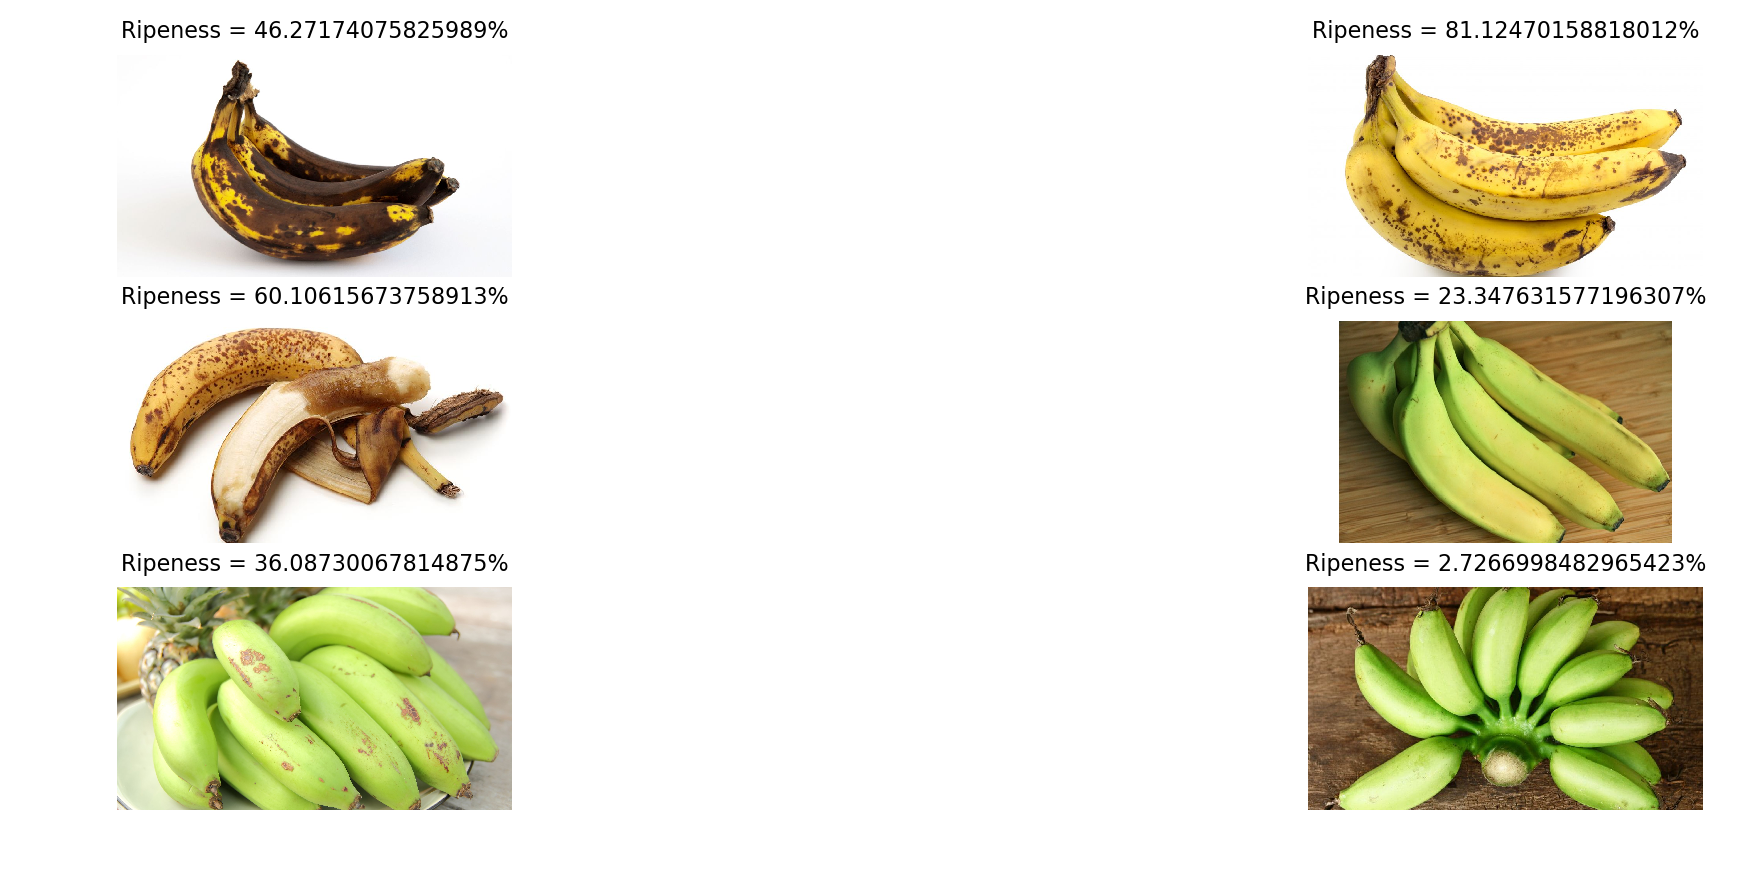

In [20]:
images(image, layer1_test2)
plt.savefig('ML3_beta_10.png')